# Problem Statement:

## In this assignment I have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.
<p> I will be downloading data in .csv format using this link: https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line</p>

### Importing Modules

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import statsmodels.api as sm
from pandas.tools.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data

In [3]:
#Defining Parser for shampoo sales data
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [4]:
#Loading the shampoo-sales.csv data into series object
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

### Data Exploration/Analysis

In [5]:
series.head() #Returns the first 5 rows of series dataframe

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [6]:
series.describe() #The summary statistics of the series dataframe

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo over a three year period, dtype: float64

In [7]:
series.shape #Return a tuple representing the dimensionality of series DataFrame.

(36,)

In [8]:
#Prints the index (axis labels) of the series dataframe.
print(series.index)

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)


In [9]:
series.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [10]:
#Positive serial correlation is associated with Durbin-Watson values below 2 and negative serial correlation with Durbin-Watson values above 2.
#Prints Durbin-Watson statistic of series data.
print("Durbin-Watson statistic:",sm.stats.durbin_watson(series))

Durbin-Watson statistic: 0.09548538187456361


<p>The value of Durbin-Watson statistic is close to 2 if the errors are uncorrelated. In our example, it is 0.09548538187456361. That means that there is a strong evidence that the variable has high autocorrelation.</p>

### Data Visualization

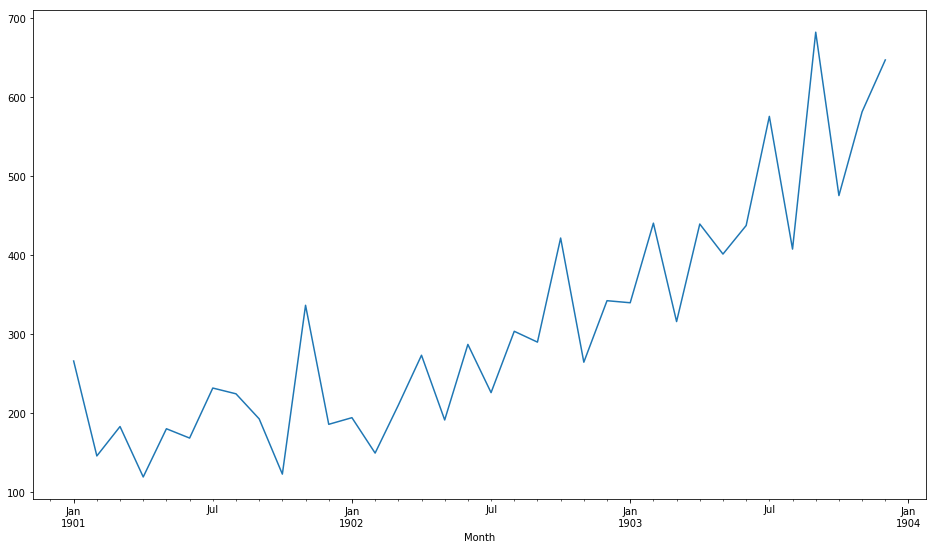

In [11]:
#Makes plot of series data
series.plot(figsize=(16,9))
plt.show()

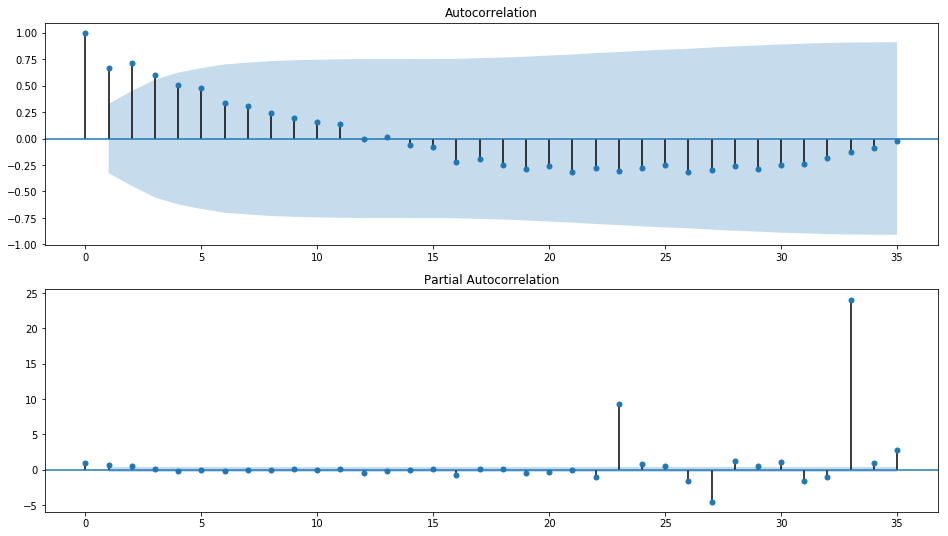

In [12]:
#Autocorrelation Plot
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=35, ax=ax2)

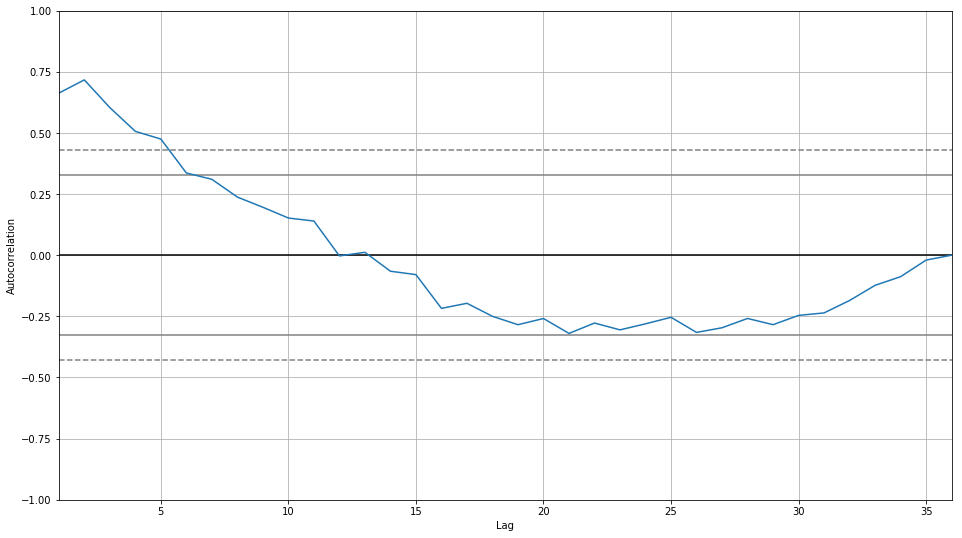

In [13]:
#Autocorrelation Plot Using Pandas
plt.figure(figsize=(16,9))
autocorrelation_plot(series)
plt.show()

<p>There is a positive correlation with the first 10 to 12 lags that is perhaps significant for the first 5 lags. A good starting point for the AR parameter of the model may be 5. </p>

### Modeling the Data

In [14]:
#Instantiating an ARIMA Model
arima_model = ARIMA(series, order=(5,1,0))

#Fitting the model
arima_model_fit = arima_model.fit(disp=0)

#Prints a summary of the fit model.
#This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.
print(arima_model_fit.summary())

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sat, 16 Mar 2019   AIC                            406.340
Time:                                                 10:40:02   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

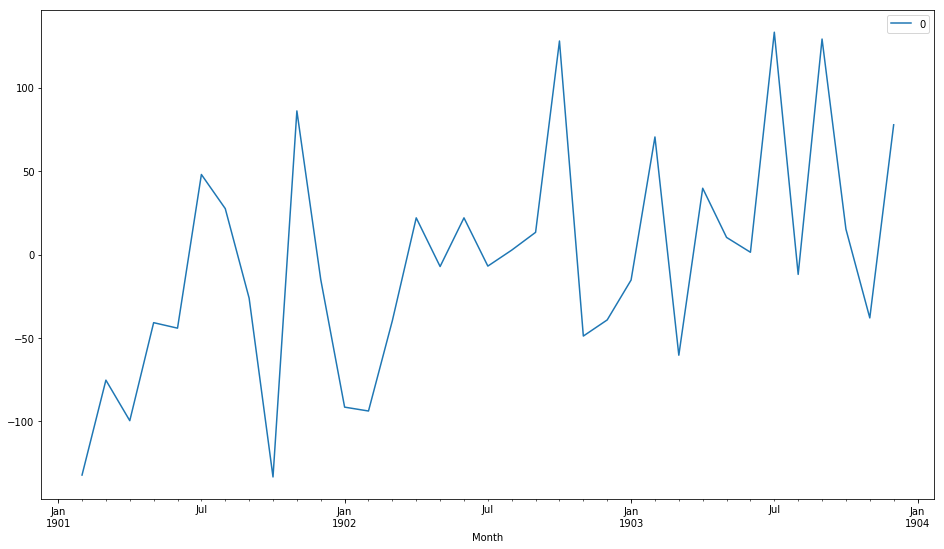

In [15]:
#Plots residual errors (Residual Error Line Plot)
residuals = pd.DataFrame(arima_model_fit.resid)
residuals.plot(figsize=(16,9))
plt.show()

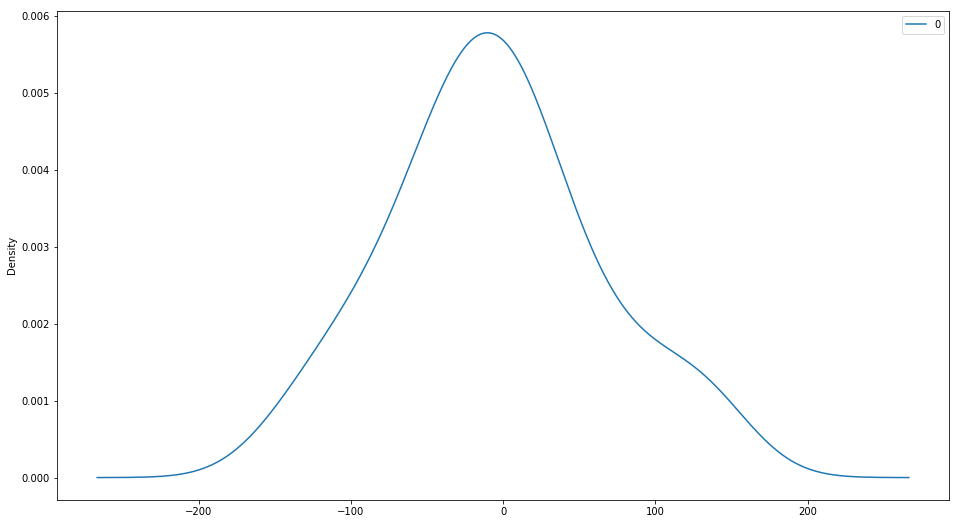

In [16]:
#Density Plot of the residual error values
residuals.plot(kind='kde',figsize=(16,9) )
pyplot.show()

In [17]:
#The summary statistics of the residuals
print(residuals.describe())

                0
count   35.000000
mean    -5.495295
std     68.132877
min   -133.296686
25%    -42.477964
50%     -7.186673
75%     24.748258
max    133.237889


### Making Predictions Using ARIMA Model

In [18]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Predicted=%f, Expected=%f' % (yhat, obs))

Predicted=349.117669, Expected=342.300000
Predicted=306.513025, Expected=339.700000
Predicted=387.376423, Expected=440.400000
Predicted=348.154259, Expected=315.900000
Predicted=386.308819, Expected=439.300000
Predicted=356.082056, Expected=401.300000
Predicted=446.379526, Expected=437.400000
Predicted=394.737264, Expected=575.500000
Predicted=434.915601, Expected=407.600000
Predicted=507.923413, Expected=682.000000
Predicted=435.482930, Expected=475.300000
Predicted=652.743793, Expected=581.300000
Predicted=546.343499, Expected=646.900000


### Evaluating the Model

In [19]:
print('Test Mean Squared Error: %.2f' %  mean_squared_error(test, predictions))

Test Mean Squared Error: 6958.33


### Visualizing Test and Predicted shampoo sales data

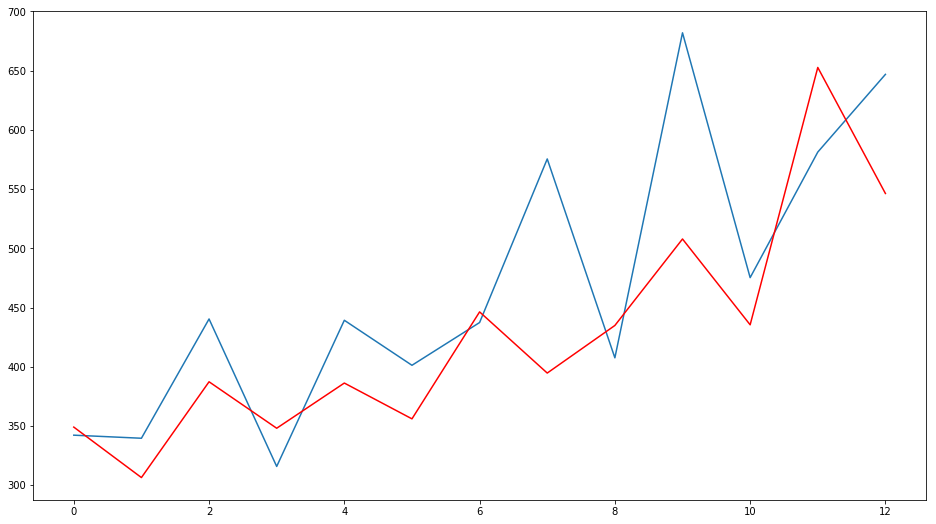

In [20]:
#Plots the test and predicted shampoo sales data
plt.figure(figsize=(16,9))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()